In [1]:
%load_ext autoreload
%autoreload 2
import cmcrameri.cm as cm  # Importing the cmcrameri colormaps
%run ct_data.py '../crunchtope_model/results.nc' -c volume
%run pf_data.py '../pflotran_model/little_dev_model/chem_model.h5'

Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Epidote', 'Zoisite', 'Chamosite-7A', 'Clinochlore-7A', 'Analcime', 'Anhydrite', 'Calcite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite-7A', 'Clinochlore-7A'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'serpentinites': ['Talc'], 'epidotes': ['Epidote', 'Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite']}
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite-7A', 'Clinochlore-7A', 'Analcime', 'Anhydrite', 'Calcite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'],

In [2]:
# Parameters
basecase = 4
time = 1000

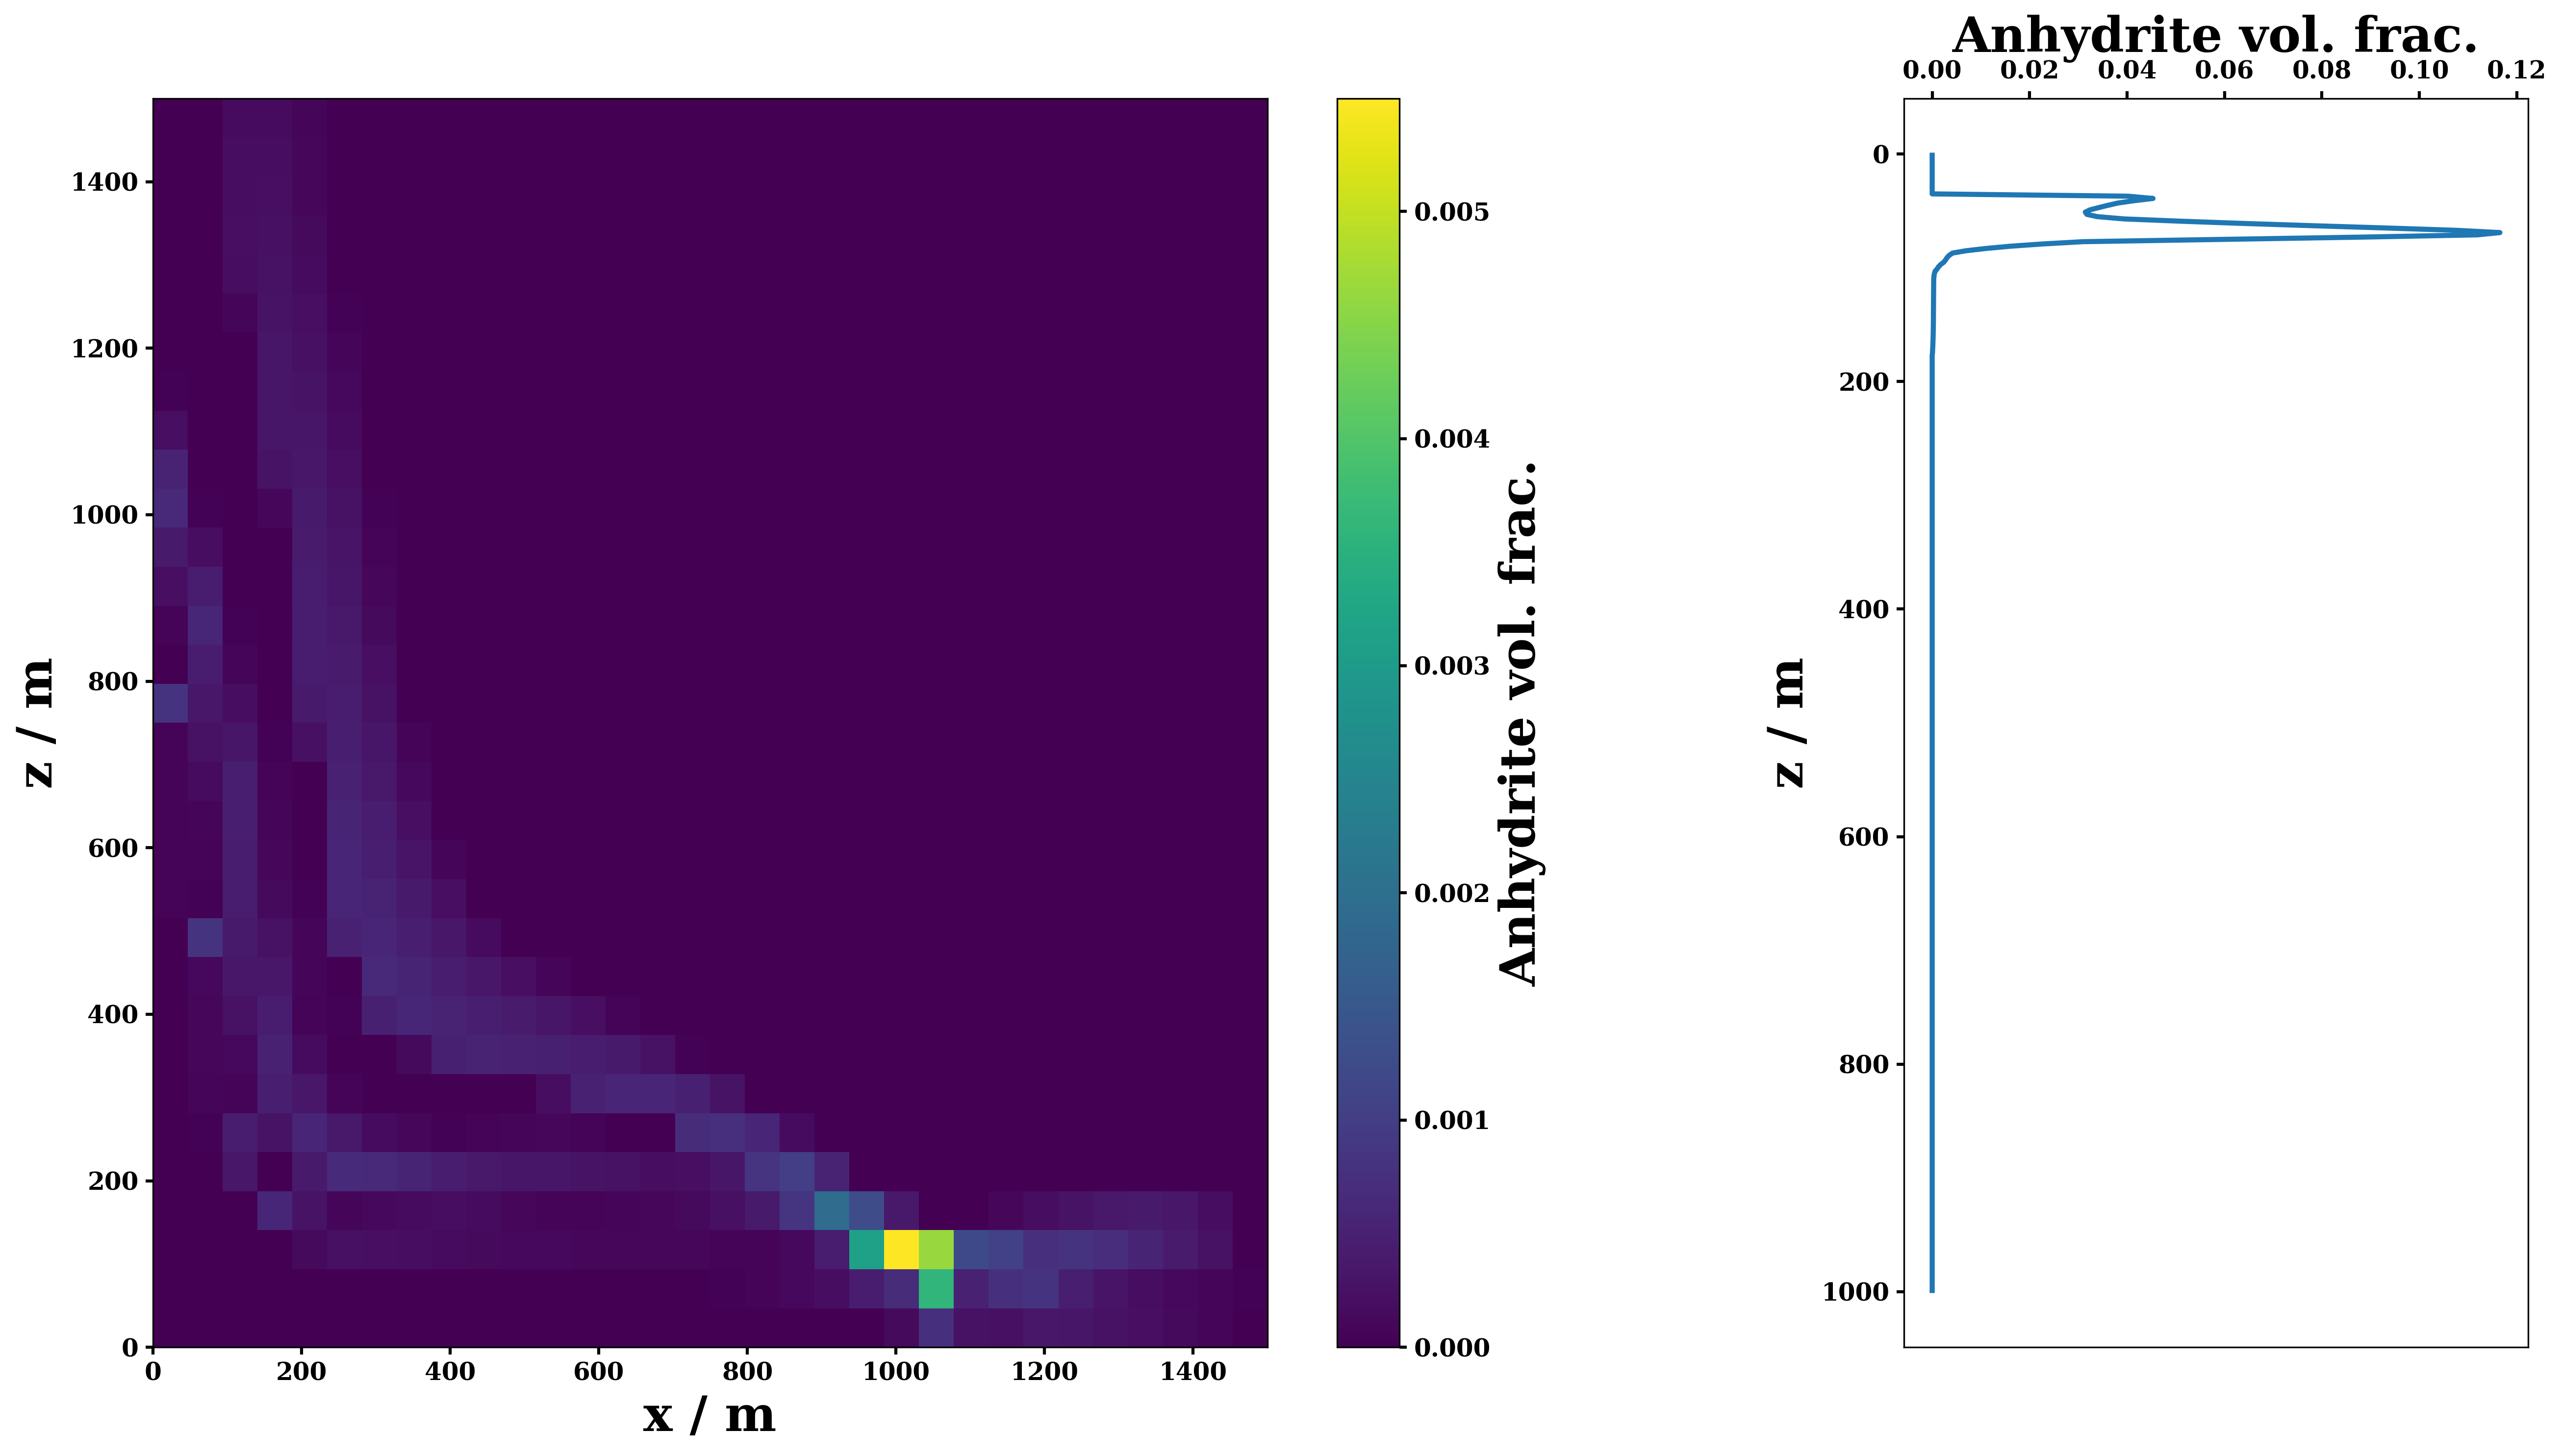

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cycler
import numpy as np
plt.style.use('custom.mplstyle')
import figures as figs
fontsize = 24

#fig = plt.figure(figsize=(20, 10))
## Define a grid with 1 row and 2 columns with specific width ratios
#gs = mpl.gridspec.GridSpec(1, 2)  # Adjust wspace to control the spacing
#
## Create the first subplot in the grid
#ax = []
#for g in gs:
#    ax.append(fig.add_subplot(g))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# PF alterationk
# Plotting the variable using matplotlib and a colormap
mesh = ax[0].pcolormesh(pf_data['x'], pf_data['z'], pf_data['Anhydrite_VF'].sel(time=time).squeeze(), cmap='viridis', shading='auto')
#ax[0].colorbar(label='Value')  # Adds a color bar with label
ax[0].set_xlabel('x / m', fontsize=fontsize)
ax[0].set_ylabel('z / m', fontsize=fontsize)
# Create an image on the main axis
# Add colorbar to the created axis
cbar=fig.colorbar(mesh, ax=ax[0])
cbar.set_label('Anhydrite vol. frac.', fontsize=fontsize)

# CT alteration
ct_cat = ct_data['volume']
ax[1].plot(ct_cat['Anhydrite'].sel(time=time, file_num=basecase).squeeze(), ct_cat['X'] )
ax[1].set_xlabel('Anhydrite vol. frac.', fontsize=fontsize)
ax[1].set_ylabel('z / m', fontsize=fontsize)
figs.axis_to_depth_profile(ax[1])

fig.tight_layout()
fig.savefig('anhydrite_comparison.png', dpi=300)